In [105]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, roc_auc_score

import warnings
warnings.simplefilter('ignore')

In [106]:
train_data = pd.read_csv('C:/Users/frane/kaggleproject/Data/preprocessed2-train-bank-data.csv', sep=';')
test_data = pd.read_csv('C:/Users/frane/kaggleproject/Data/preprocessed2-test-bank-data.csv', sep=';')

X_train, y_train = train_data.drop('y', axis=1), train_data['y']
X_test, y_test = test_data.drop('y', axis=1), test_data['y']

In [107]:
"""Creating models"""
dtc = DecisionTreeClassifier()
logr = LogisticRegression()
mlpc = MLPClassifier()
rfc = RandomForestClassifier()
svc = LinearSVC()

kf = KFold(n_splits=5, shuffle=True, random_state=31)

In [108]:
"""Choosing parameters to optimize"""

dtc_param = {
    'class_weight' : ['balanced'],
    'splitter' : ['random'],
    'max_depth' : [3, 4, 5, 6],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf' : [1, 2, 3],
    'max_features' : [None, 'sqrt', 'log2'],
    'random_state' : [1]
}

logr_param = {
    'class_weight' : ['balanced'],
    'penalty': [None, 'l2'],
    'dual' : [True, False],
    'random_state' : [1],
    'max_iter' : [80, 90, 100, 110, 120]
}

mlpc_param = {
    'hidden_layer_sizes' : [(90,), (100,), (110,)],
    'max_iter' : [7, 8, 9, 10, 11, 12, 13],
    'power_t' : [0.4, 0.45, 0.5, 0.55, 0.6],
    'random_state' : [1]
}

rfc_param = {
    'class_weight' : ['balanced'],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'n_estimators' : [60, 70, 80, 90, 100],
    'max_depth' : [5, 6, 7, 8, 9, 10],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf' : [1, 2, 3],
    'random_state' : [1]
}

svc_param = {
    'class_weight' : ['balanced'],
    'penalty' : ['l1', 'l2'],
    'loss' : ['hinge', 'squared_hinge'],
    'dual' : [True, False],
    'random_state' : [1]
}

In [109]:
"""Creating GridSearch objects for each model"""

dtc_gs = GridSearchCV(estimator=dtc, param_grid=dtc_param, cv=kf, scoring='roc_auc', verbose=1)
logr_gs = GridSearchCV(estimator=logr, param_grid=logr_param, cv=kf, scoring='roc_auc', verbose=1)
mlpc_gs = GridSearchCV(estimator=mlpc, param_grid=mlpc_param, cv=kf, scoring='roc_auc', verbose=1)
rfc_gs = GridSearchCV(estimator=rfc, param_grid=rfc_param, cv=kf, scoring='roc_auc', verbose=1)
svc_gs = GridSearchCV(estimator=svc, param_grid=svc_param, cv=kf, scoring='roc_auc', verbose=1)

In [110]:
"""Optimalizing models for highest ROC AUC"""

dtc_gs.fit(X_train, y_train)

logr_gs.fit(X_train, y_train)

mlpc_gs.fit(X_train, y_train)

rfc_gs.fit(X_train, y_train)

svc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 105 candidates, totalling 525 fits
Fitting 5 folds for each of 810 candidates, totalling 4050 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=31, shuffle=True),
             estimator=LinearSVC(),
             param_grid={'class_weight': ['balanced'], 'dual': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2'], 'random_state': [1]},
             scoring='roc_auc', verbose=1)

In [112]:
print(f"Best estimators:\n{dtc_gs.best_estimator_}\n{logr_gs.best_estimator_}\n{mlpc_gs.best_estimator_}\n{rfc_gs.best_estimator_}\n{svc_gs.best_estimator_}")

Best estimators:
DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=4, random_state=1, splitter='random')
LogisticRegression(class_weight='balanced', max_iter=90, random_state=1)
MLPClassifier(hidden_layer_sizes=(110,), max_iter=13, power_t=0.4,
              random_state=1)
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, min_samples_leaf=3, n_estimators=80,
                       random_state=1)
LinearSVC(class_weight='balanced', dual=False, penalty='l1', random_state=1)


In [115]:
dtc = dtc_gs.best_estimator_
logr = logr_gs.best_estimator_
mlpc = mlpc_gs.best_estimator_
rfc = rfc_gs.best_estimator_
svc = svc_gs.best_estimator_

In [121]:
results = {
    'DTC' : (roc_auc_score(y_test, dtc.predict_proba(X_test)[:,1]), accuracy_score(y_test, dtc.predict(X_test))),
    'LOGR' : (roc_auc_score(y_test, logr.predict_proba(X_test)[:,1]), accuracy_score(y_test, logr.predict(X_test))),
    'MLPC' : (roc_auc_score(y_test, mlpc.predict_proba(X_test)[:,1]), accuracy_score(y_test, mlpc.predict(X_test))),
    'RFC' : (roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1]), accuracy_score(y_test, rfc.predict(X_test))),
    'SVC' : (roc_auc_score(y_test, svc._predict_proba_lr(X_test)[:,1]), accuracy_score(y_test, svc.predict(X_test)))
}

results_df = pd.DataFrame(results, index=['ROC AUC', 'Accuracy'])

Metrics of optimalized models working on unseen data

In [122]:
results_df

,DTC,LOGR,MLPC,RFC,SVC
ROC AUC,0.783402,0.778021,0.794596,0.802916,0.778680
Accuracy,0.847524,0.778558,0.904201,0.856677,0.773417


<AxesSubplot:>

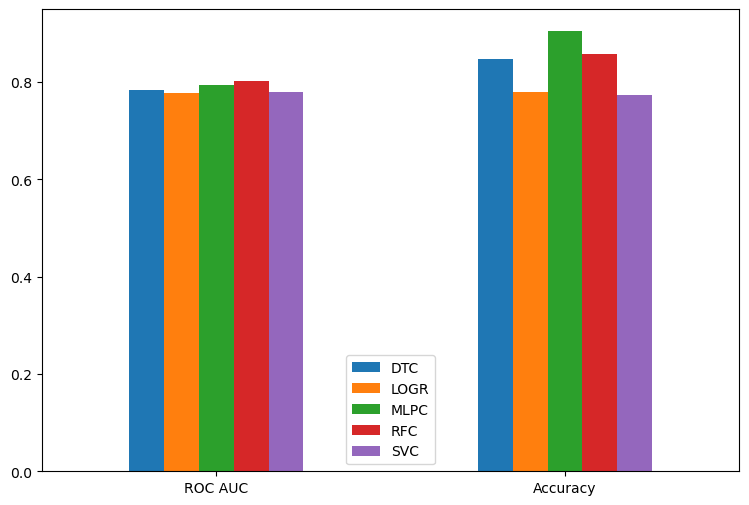

In [126]:
results_df.plot(kind='bar', figsize=(9,6), rot=0)

We can see that MLP Classifier and Random Forest Classifier stand out from other models